In [ ]:
#Nabaa Naguib Mostafa
#Assignment 1
#Logistic Regression - XGBoost - Decision Tree

Imoprting necessary frameworks.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
import sklearn
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


Loading the data

In [3]:
#Now we will load the data:
data = pd.read_csv("UCI_Credit_Card.csv")

#let's see the first 5 rows of the data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Getting to know the data

In [4]:

#let's get to know about the data a bit more:
print(data.shape)
print("##################################################")
print(data.info())
print("##################################################")
print(data.describe())
print("##################################################")
print(data.columns)


(30000, 25)
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                

In [5]:
#from the previous output we can tell that the data has 30000 rows and 25 columns.
#it has no null values and all the columns' data are numerical (either int or float).
# we will visualize the data to further understand it:

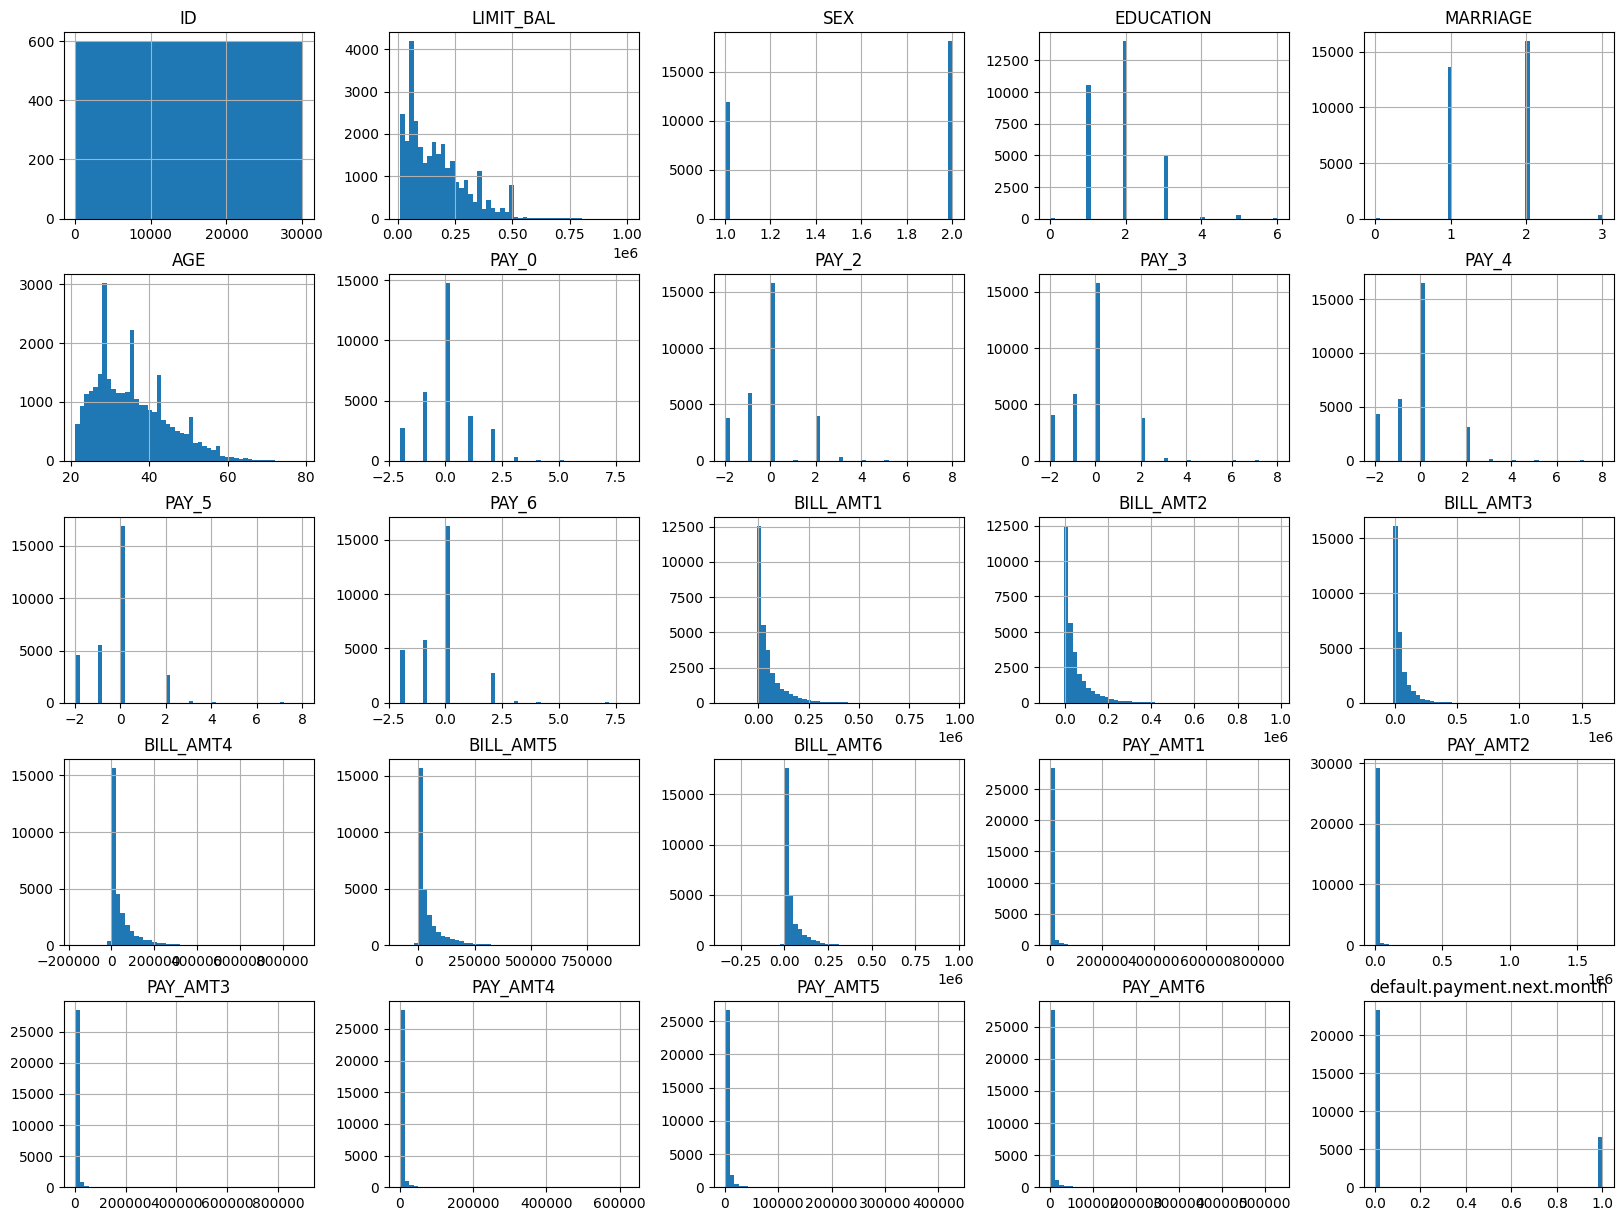

In [6]:
data.hist(bins=50 , figsize=(20,15))
plt.show()
#the histogram helps us to see the distribution of the data.
#we can see that the data is not normally distributed.
#to make sure there are no outliers we will use boxplot.

ID                               Axes(0.125,0.747241;0.133621x0.132759)
LIMIT_BAL                     Axes(0.285345,0.747241;0.133621x0.132759)
SEX                            Axes(0.44569,0.747241;0.133621x0.132759)
EDUCATION                     Axes(0.606034,0.747241;0.133621x0.132759)
MARRIAGE                      Axes(0.766379,0.747241;0.133621x0.132759)
AGE                              Axes(0.125,0.587931;0.133621x0.132759)
PAY_0                         Axes(0.285345,0.587931;0.133621x0.132759)
PAY_2                          Axes(0.44569,0.587931;0.133621x0.132759)
PAY_3                         Axes(0.606034,0.587931;0.133621x0.132759)
PAY_4                         Axes(0.766379,0.587931;0.133621x0.132759)
PAY_5                            Axes(0.125,0.428621;0.133621x0.132759)
PAY_6                         Axes(0.285345,0.428621;0.133621x0.132759)
BILL_AMT1                      Axes(0.44569,0.428621;0.133621x0.132759)
BILL_AMT2                     Axes(0.606034,0.428621;0.133621x0.

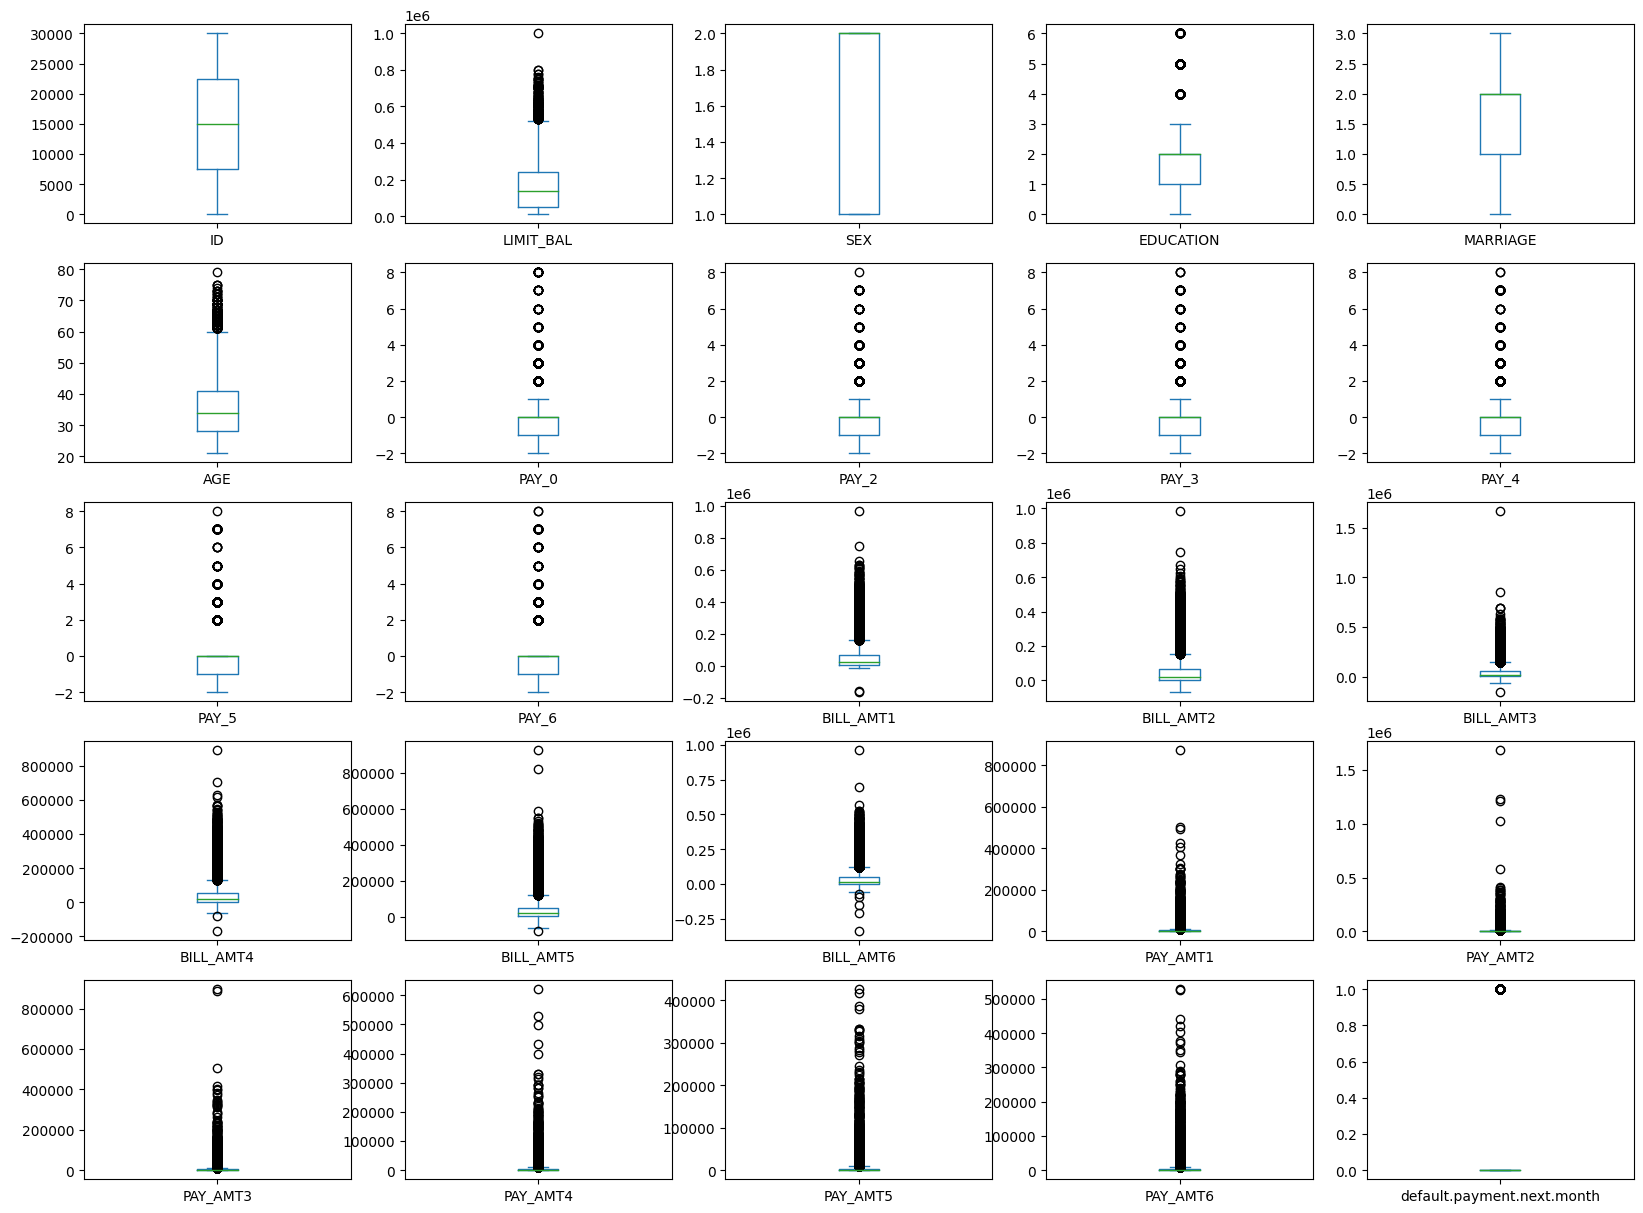

In [7]:
data.plot(kind="box", subplots=True, layout=(5,5), figsize=(20,15))
#the box plot here showed us that there are actually outliers in the data.
#but we can't really remove them since they are explained in the data description.

Data cleanning and preprocessing

In [8]:
#from the dataset explanation on Kaggle we understand that:

# MARRIAGE: Marital status (1=married, 2=single, 3=others)
#since there is 0 in this column and it's not specified what it resembles, we will drob the rows with 0 in this column.
data.drop(data[data["MARRIAGE"] == 0].index, inplace  = True)

#same for the education: EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
data.drop(data[data["EDUCATION"] == 0].index, inplace  = True)

#we will also sum all the unknown and others of this column into one category.
data["EDUCATION"] = data["EDUCATION"].apply(lambda ed_val: 4 if (ed_val == 5 or ed_val == 6) else ed_val)
print(data["EDUCATION"].unique())

#we will drop the ID column since it's not useful for our analysis.
data.drop("ID", axis = 1 , inplace  = True)


[2 1 3 4]


array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>],
       [<Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>],
       [<Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
    

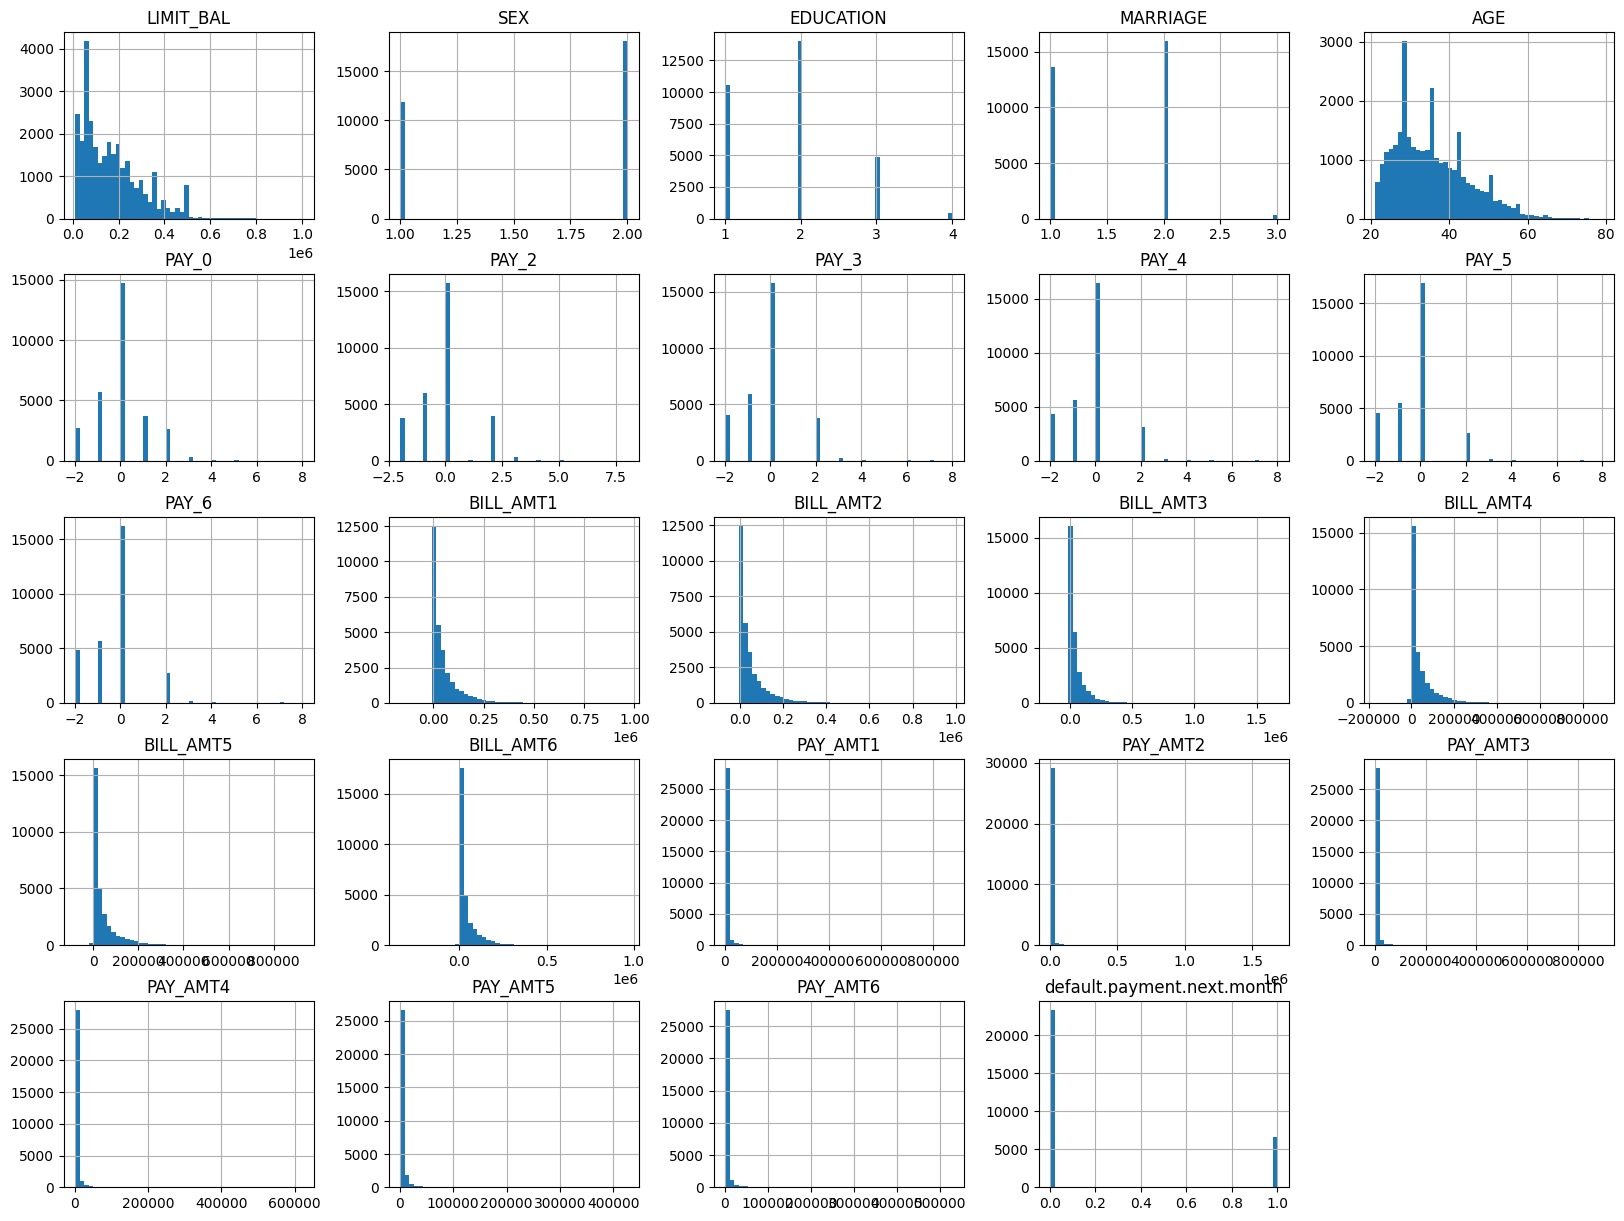

In [9]:
#now we will visualize the data again to see the difference.
data.hist(bins=50 , figsize=(20,15))

In [10]:
#we see that the data is not normally distributed, from the info about the dataset we understand that the columns 'PAY_AMTn' and "BILL_AMTn'
#have a lot of zeros, but they are not missing values, nor are they outliers, so we will keep them as they are for now.

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

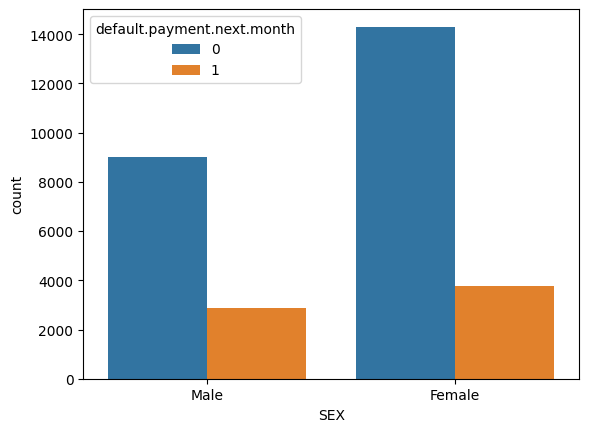

In [11]:
#we want check if the sex column has correlation with the default payment next month.

#we will use a bar plot to visualize the data.
plot = sns.countplot(x = "SEX", data = data, hue = "default.payment.next.month")
plot.set_xticklabels(["Male","Female"])

#we deduce that females has lower default payment probabilities than men.

[Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Other')]

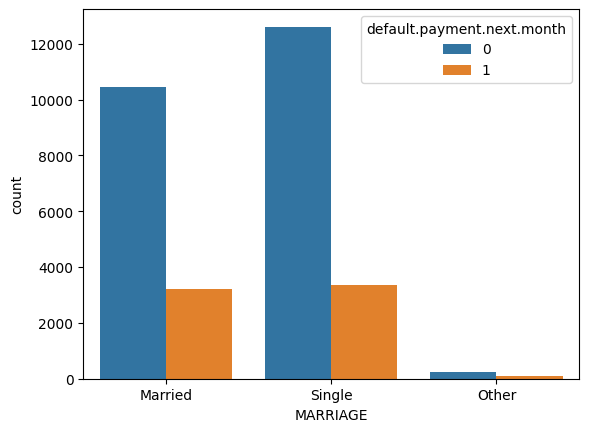

In [12]:
#now the same but for the marriage column.
plot = sns.countplot(x = "MARRIAGE", data = data, hue = "default.payment.next.month")
plot.set_xticklabels(["Married","Single","Other"])

#we deduce that msingle people has lower default payment probabilities than married people.

[Text(0, 0, 'Graduate school'),
 Text(1, 0, 'University'),
 Text(2, 0, 'High school'),
 Text(3, 0, 'Others')]

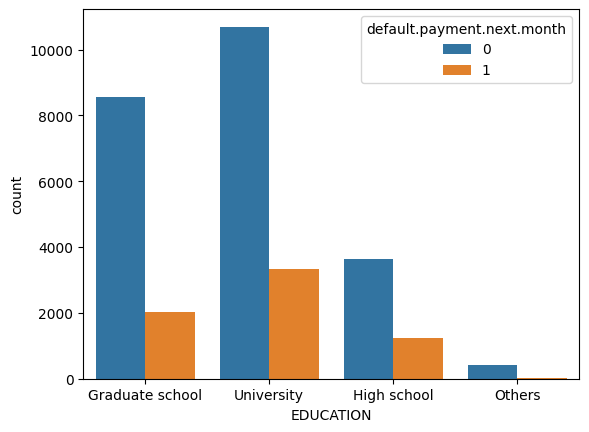

In [13]:
#now for the education column.
plot = sns.countplot(x = "EDUCATION", data = data, hue = "default.payment.next.month")
plot.set_xticklabels(["Graduate school","University","High school","Others"])

#Making a dediuction from this plot alone is not possible.

Data Categorizing

In [14]:
#this is categorizing the columns into smaller groubs than they initially are now which is 25 column:
def cat_var(data):                       #categorical groub
    return ["SEX", "EDUCATION", "MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

def disc_var():                          #discrete groub
    return ["AGE"]

def cont_var(data):                      #continuous groub
    return [col for col in data.columns if ("PAY_AMT") in col] + [col for col in data.columns if ("BILL_AMT") in col] + [col for col in data.columns if ("LIMIT_BAL") in col] 

Final Enhancements:

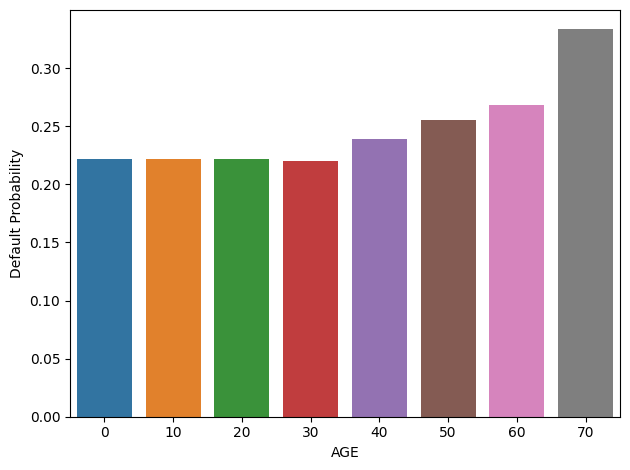

In [15]:
#we will now check if the probability that default payments increases with the increasing of age or not:
for plot_num,desired_col in enumerate([col for col in data.columns if col == "AGE"]):
    val_list = list(range(0, int(data[desired_col].max() + 1) , 10))
    proportion_list = []
    
    for value in val_list:
        proportion_list.append((value,round(data[data[desired_col] > value]["default.payment.next.month"].mean(),4)))

    val_df = pd.DataFrame(proportion_list)
    val_df.rename({0: desired_col, 1:"Default Probability"}, axis = 1, inplace = True)

    bar_plt = sns.barplot(data = val_df, x = desired_col, y = "Default Probability");

plt.tight_layout()

plt.show()


#there is an increase in the default probability with the increase of age.

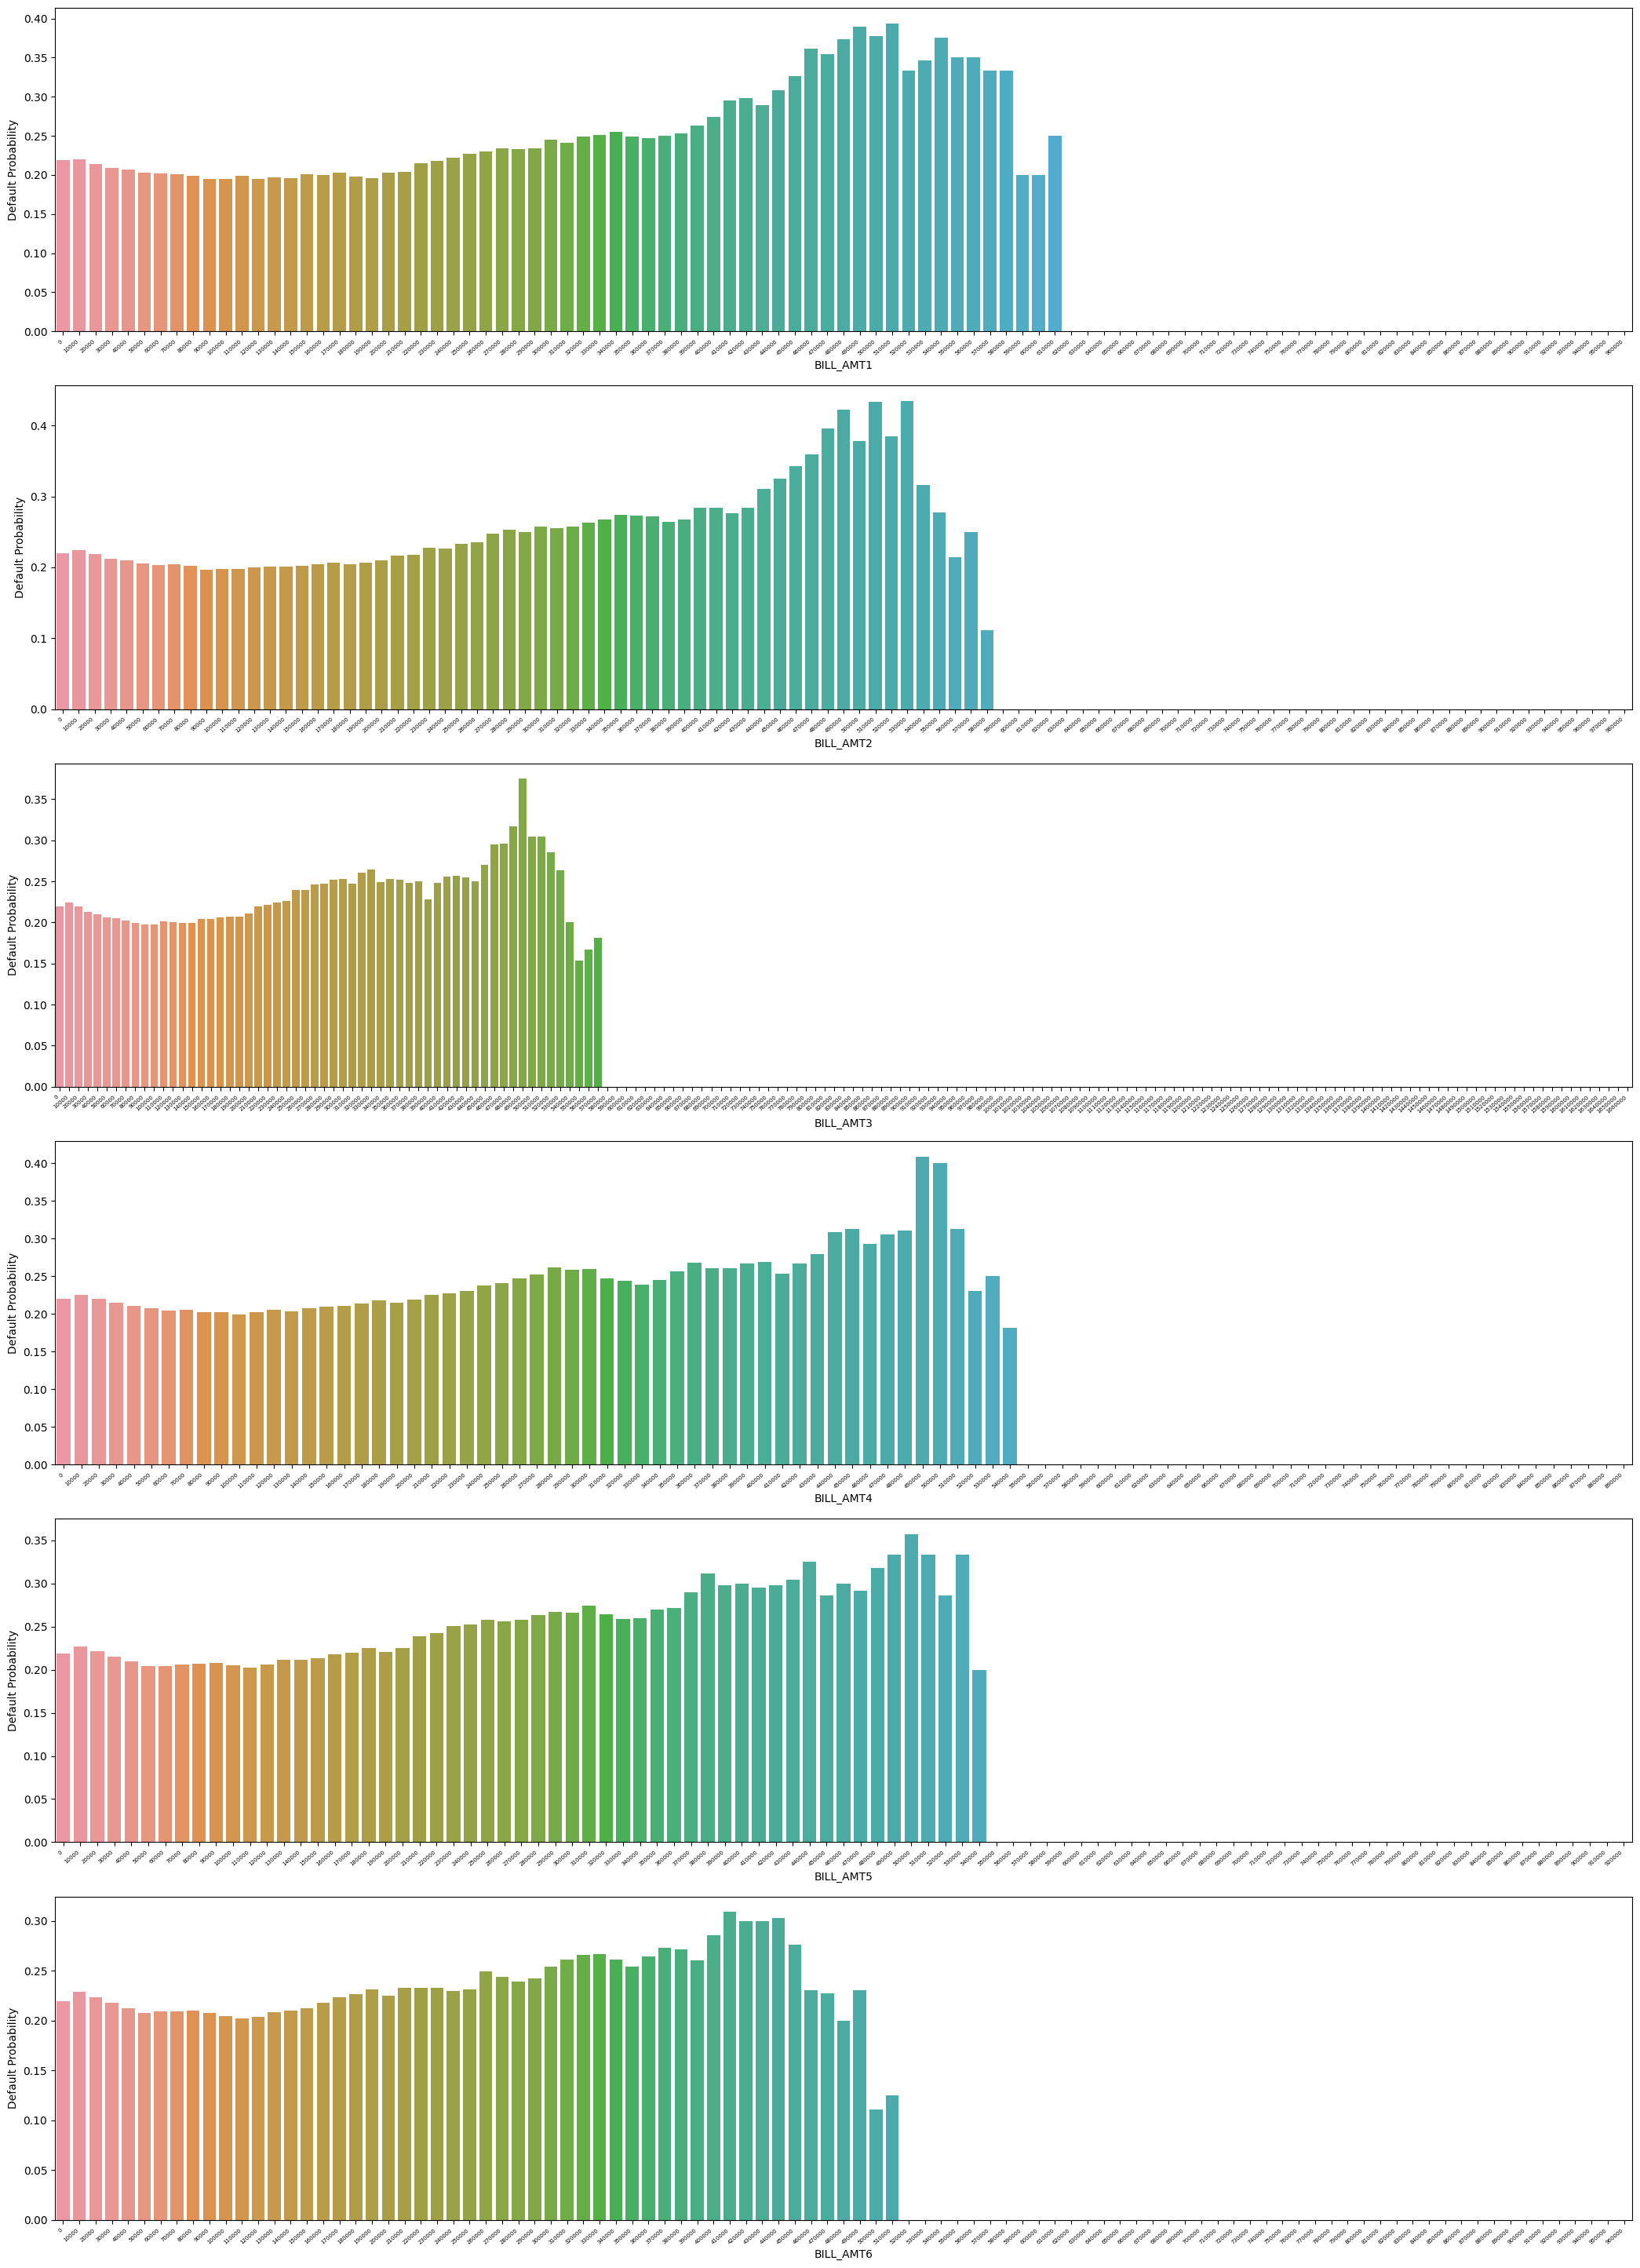

In [16]:
#we will now check if the probability of default increase with larger bill amount or not:

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(21, 29))

for plot_num,desired_col in enumerate([col for col in data.columns if col.startswith("BILL_AMT")]):
    
    val_list = list(range(0, int(data[desired_col].max() + 1) , 10000))
    proportion_list = []
    
    for value in val_list:
        proportion_list.append((value,round(data[data[desired_col] > value]["default.payment.next.month"].mean(),4)))

    val_df = pd.DataFrame(proportion_list)
    val_df.rename({0: desired_col, 1:"Default Probability"}, axis = 1, inplace = True)

    bar_plt = sns.barplot(data = val_df, x = desired_col, y = "Default Probability", ax = axes[plot_num])
    bar_plt.set_xticklabels(bar_plt.get_xticklabels(), rotation=40, ha="right", fontsize = 5);

plt.tight_layout()

plt.show()

#there is indeed an increase in the default probability with the increase of the bill amount.

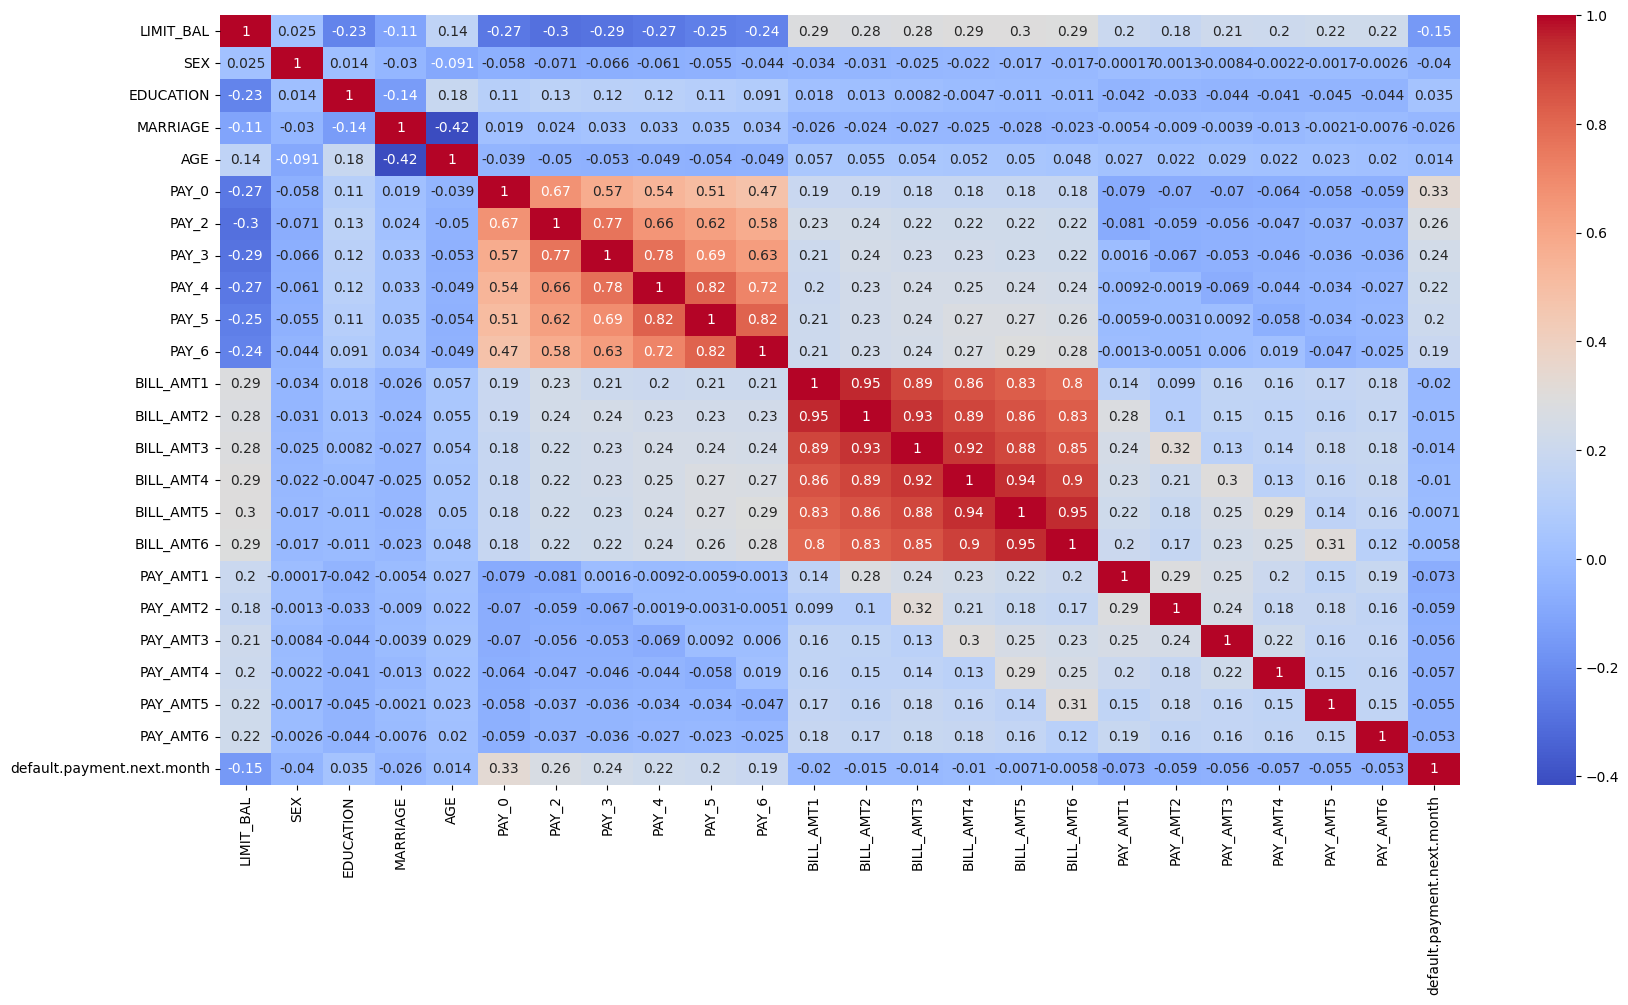

In [17]:
#final visualization for the data:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()


In [18]:
#check if we have any categorical data, deal with them and replace them with the mean value of the column if we found any.
data.info()
data.isnull().sum()
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29932 non-null  float64
 1   SEX                         29932 non-null  int64  
 2   EDUCATION                   29932 non-null  int64  
 3   MARRIAGE                    29932 non-null  int64  
 4   AGE                         29932 non-null  int64  
 5   PAY_0                       29932 non-null  int64  
 6   PAY_2                       29932 non-null  int64  
 7   PAY_3                       29932 non-null  int64  
 8   PAY_4                       29932 non-null  int64  
 9   PAY_5                       29932 non-null  int64  
 10  PAY_6                       29932 non-null  int64  
 11  BILL_AMT1                   29932 non-null  float64
 12  BILL_AMT2                   29932 non-null  float64
 13  BILL_AMT3                   299

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Now to machine learning:
1. Splitting the data.

In [19]:
print(data["default.payment.next.month"].unique())

#we see that the outcome is binary so we will use logistic regression (Binary Classification).

[1 0]


In [20]:
X = data.drop("default.payment.next.month", axis=1)
y = data["default.payment.next.month"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Replace infinite values consistently for both training and testing datasets.
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)

#Impute missing values consistently using statistics from the training set.
mean_values = X_train.mean()
X_train.fillna(mean_values, inplace=True)
X_test.fillna(mean_values, inplace=True)

#Apply log transformations consistently to X_train and X_test, for the columns that need it.
columns_to_transform = ["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                         "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

for column in columns_to_transform:
    X_train[column] = np.log(X_train[column] + 1e-3)  # Adding a pseudo-count
    X_test[column] = np.log(X_test[column] + 1e-3)  # Adding a pseudo-count

C:\Users\nabaa\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


2. Needed Functions for plotting ROC, Confusion Matrix and metrics for the models:

In [29]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    con_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.4)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.4)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    
def print_metrics(y_true, y_pred, model_name):
    print(f'Accuracy Score for {model_name}: {accuracy_score(y_true, y_pred)}')
    print(f'Precision Score for {model_name}: {precision_score(y_true, y_pred)}')
    print(f'Recall Score for {model_name}: {recall_score(y_true, y_pred)}')
    print(f'F1 Score for {model_name}: {f1_score(y_true, y_pred)}')
    print(f'ROC AUC Score for {model_name}: {roc_auc_score(y_true, y_pred)}')
    print(f'Classification Report for {model_name}: \n {classification_report(y_true, y_pred)}')
    
def plot_feature_importances(model, model_name):
    plt.figure(figsize=(6, 4))
    sns.set(font_scale=1.4)
    sns.barplot(x=model.feature_importances_, y=X_train.columns)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(f'Feature Importances for {model_name}')
    plt.show()

3. Logistic Regression Model

In [30]:
#first use imputer to replace any NaN values that may have emerged.
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [31]:
#Making the model:
logistic_regression_model = LogisticRegression(random_state=42 ,
                                               penalty = "l2", 
                                               class_weight = "balanced",)

#Trainning the model:
logistic_regression_model.fit(X_train_imputed, y_train)

#Making predictions:
y_pred_logistic = logistic_regression_model.predict(X_test_imputed)

C:\Users\nabaa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. XGBoost Model

In [32]:
#Making the model:
xgboost_model = xgb.XGBClassifier(random_state=42)

# Trainning the model:
xgboost_model.fit(X_train_imputed, y_train)

# Making predictions:
y_pred_xgboost = xgboost_model.predict(X_test_imputed)

5.    Decision Tree Model

In [33]:
#Making the model:
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Training the model:
decision_tree_model.fit(X_train_imputed, y_train)

# Making predictions:
y_pred_decision_tree = decision_tree_model.predict(X_test_imputed)

In [ ]:
#In the context of sklearn.metrics.classification_report;  support is the number of samples of the true response that lie in that classification category.

6. Comparing the Models' Preformances:

logistic_regression_model Model:


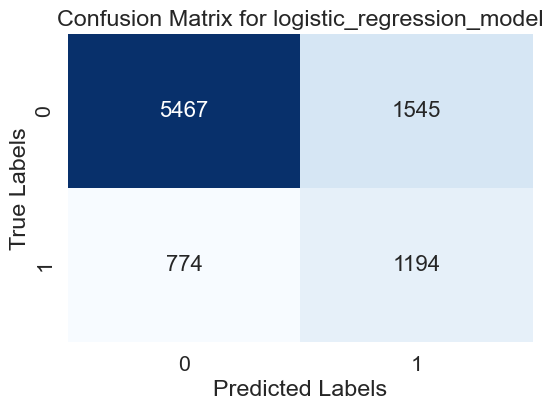

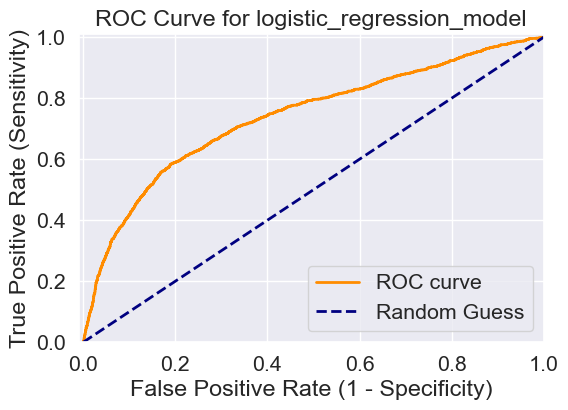

Accuracy Score for logistic_regression_model: 0.7417594654788419
Precision Score for logistic_regression_model: 0.4359255202628697
Recall Score for logistic_regression_model: 0.6067073170731707
F1 Score for logistic_regression_model: 0.5073295092415552
ROC AUC Score for logistic_regression_model: 0.69318537559306
Classification Report for logistic_regression_model: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      7012
           1       0.44      0.61      0.51      1968

    accuracy                           0.74      8980
   macro avg       0.66      0.69      0.67      8980
weighted avg       0.78      0.74      0.76      8980

xgboost_model Model:


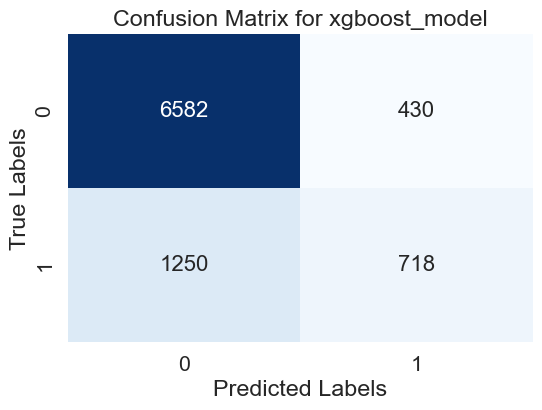

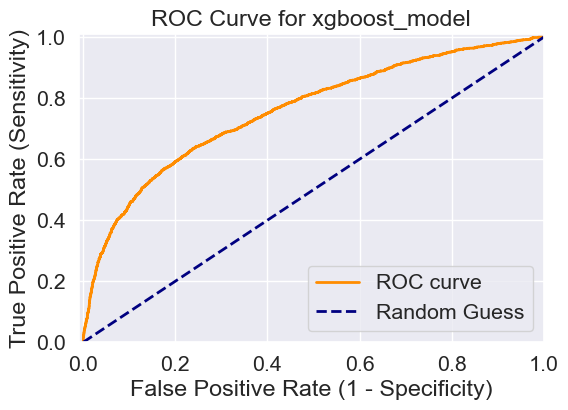

Accuracy Score for xgboost_model: 0.8129175946547884
Precision Score for xgboost_model: 0.6254355400696864
Recall Score for xgboost_model: 0.3648373983739837
F1 Score for xgboost_model: 0.4608472400513478
ROC AUC Score for xgboost_model: 0.6517569764260106
Classification Report for xgboost_model: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7012
           1       0.63      0.36      0.46      1968

    accuracy                           0.81      8980
   macro avg       0.73      0.65      0.67      8980
weighted avg       0.79      0.81      0.79      8980



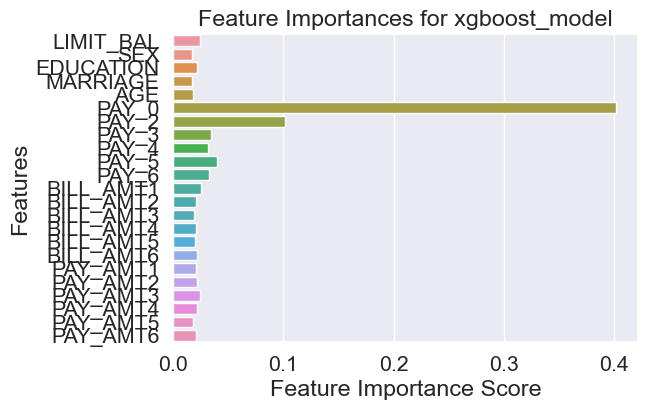

decision_tree_model Model:


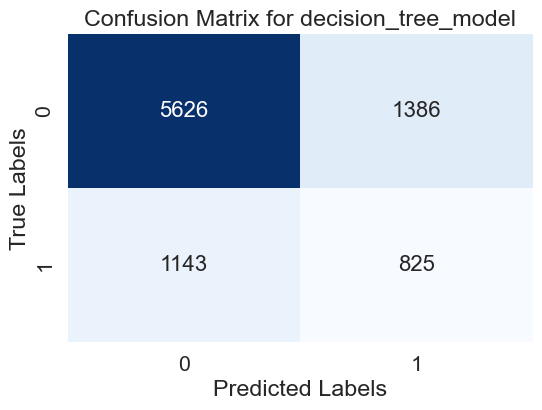

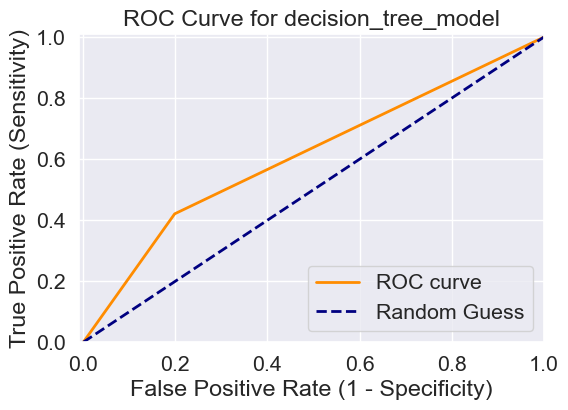

Accuracy Score for decision_tree_model: 0.7183741648106904
Precision Score for decision_tree_model: 0.373134328358209
Recall Score for decision_tree_model: 0.4192073170731707
F1 Score for decision_tree_model: 0.3948312993539125
ROC AUC Score for decision_tree_model: 0.6107730823814228
Classification Report for decision_tree_model: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      7012
           1       0.37      0.42      0.39      1968

    accuracy                           0.72      8980
   macro avg       0.60      0.61      0.61      8980
weighted avg       0.73      0.72      0.72      8980



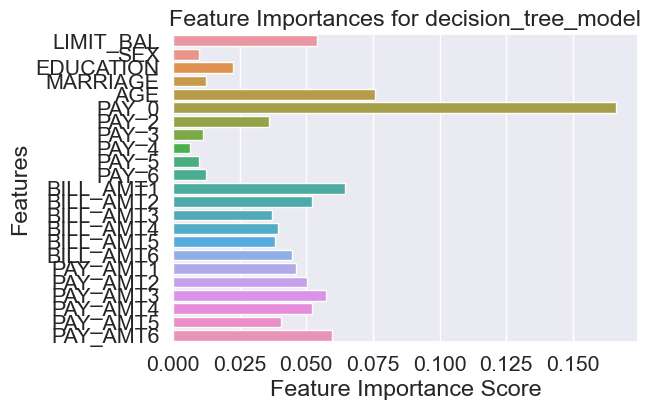

In [38]:
#The Logistic Regression model:
logistic_model_name = "logistic_regression_model" 
print(f"{logistic_model_name} Model:")
plot_confusion_matrix(y_test, y_pred_logistic, logistic_model_name)
plot_roc_curve(y_test, logistic_regression_model.predict_proba(X_test_imputed)[:, 1], logistic_model_name)
print_metrics(y_test, y_pred_logistic, logistic_model_name)

# The XGBoost model:
xgboost_model_name = "xgboost_model" 
print(f"{xgboost_model_name} Model:")
plot_confusion_matrix(y_test, y_pred_xgboost, xgboost_model_name)
plot_roc_curve(y_test, xgboost_model.predict_proba(X_test_imputed)[:, 1], xgboost_model_name)
print_metrics(y_test, y_pred_xgboost, xgboost_model_name)
plot_feature_importances(xgboost_model, xgboost_model_name)

# The Decision Tree model:
decision_tree_model_name = "decision_tree_model" 
print(f"{decision_tree_model_name} Model:")
plot_confusion_matrix(y_test, y_pred_decision_tree, decision_tree_model_name)
plot_roc_curve(y_test, decision_tree_model.predict_proba(X_test_imputed)[:, 1], decision_tree_model_name)
print_metrics(y_test, y_pred_decision_tree, decision_tree_model_name)
plot_feature_importances(decision_tree_model, decision_tree_model_name)
